In [248]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [249]:
df = pd.read_csv('../datasets/bitcoin-historical-data.csv', nrows=2000)
df = df[::-1]

In [250]:
datetime = pd.to_datetime(df.pop('Date'), format='%m/%d/%Y')
df.sort_index(ascending=False, inplace=True)
df.sort_index(ascending=False, inplace=True)
df.reset_index(inplace=True, drop=True)

print(datetime)

1999   2018-12-02
1998   2018-12-03
1997   2018-12-04
1996   2018-12-05
1995   2018-12-06
          ...    
4      2024-05-19
3      2024-05-20
2      2024-05-21
1      2024-05-22
0      2024-05-23
Name: Date, Length: 2000, dtype: datetime64[ns]


In [251]:
cols_obj_float = ['Price', 'Open', 'High', 'Low']
for col in cols_obj_float:
    df[col] = df[col].apply(lambda x: float(x.replace(',', '')))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2000 non-null   float64
 1   Open      2000 non-null   float64
 2   High      2000 non-null   float64
 3   Low       2000 non-null   float64
 4   Vol.      2000 non-null   object 
 5   Change %  2000 non-null   object 
dtypes: float64(4), object(2)
memory usage: 93.9+ KB


In [252]:
def conv_to_float(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '')) * 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1000000
        elif 'B' in value:
            return float(value.replace('B', '')) * 1000000000
    return value

df['Vol.'] = df['Vol.'].apply(conv_to_float)
df['Change %'] = df['Change %'].apply(lambda x: float(x.replace('%', '')))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2000 non-null   float64
 1   Open      2000 non-null   float64
 2   High      2000 non-null   float64
 3   Low       2000 non-null   float64
 4   Vol.      2000 non-null   float64
 5   Change %  2000 non-null   float64
dtypes: float64(6)
memory usage: 93.9 KB


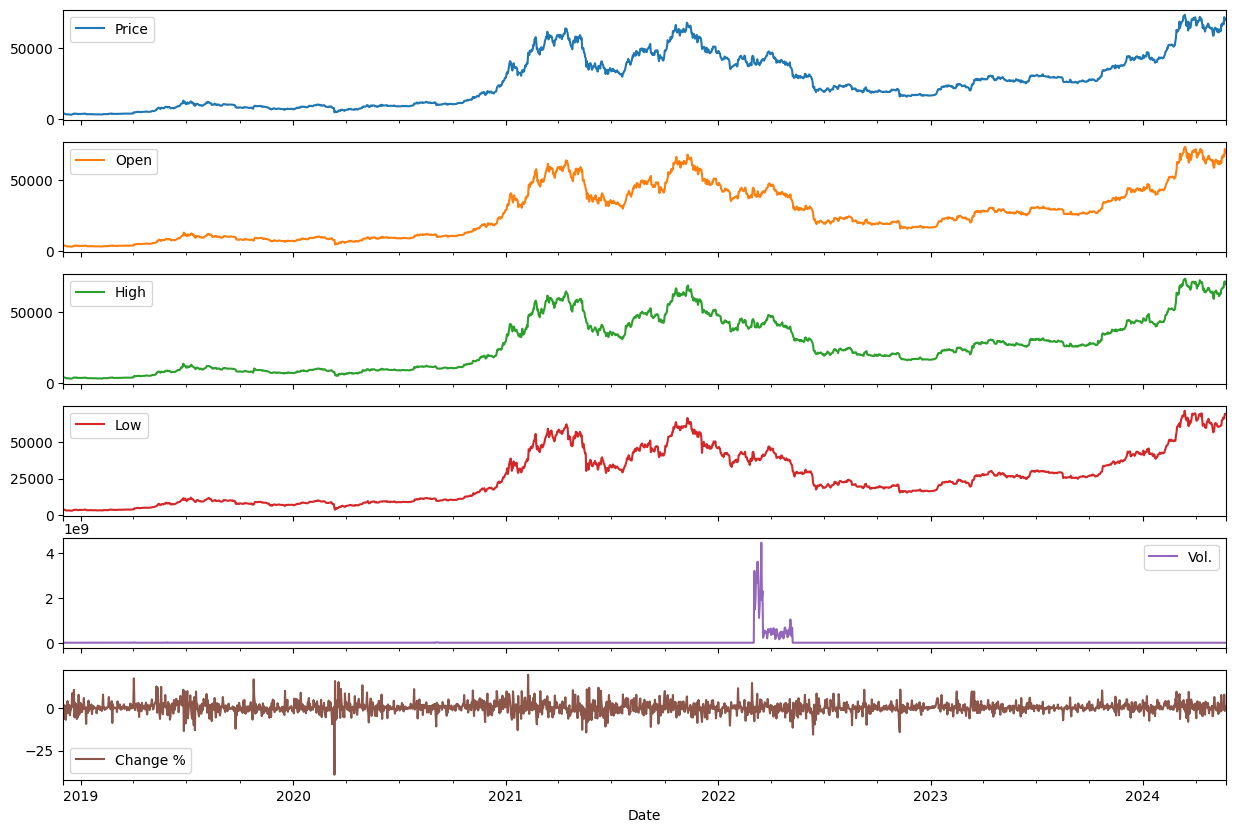

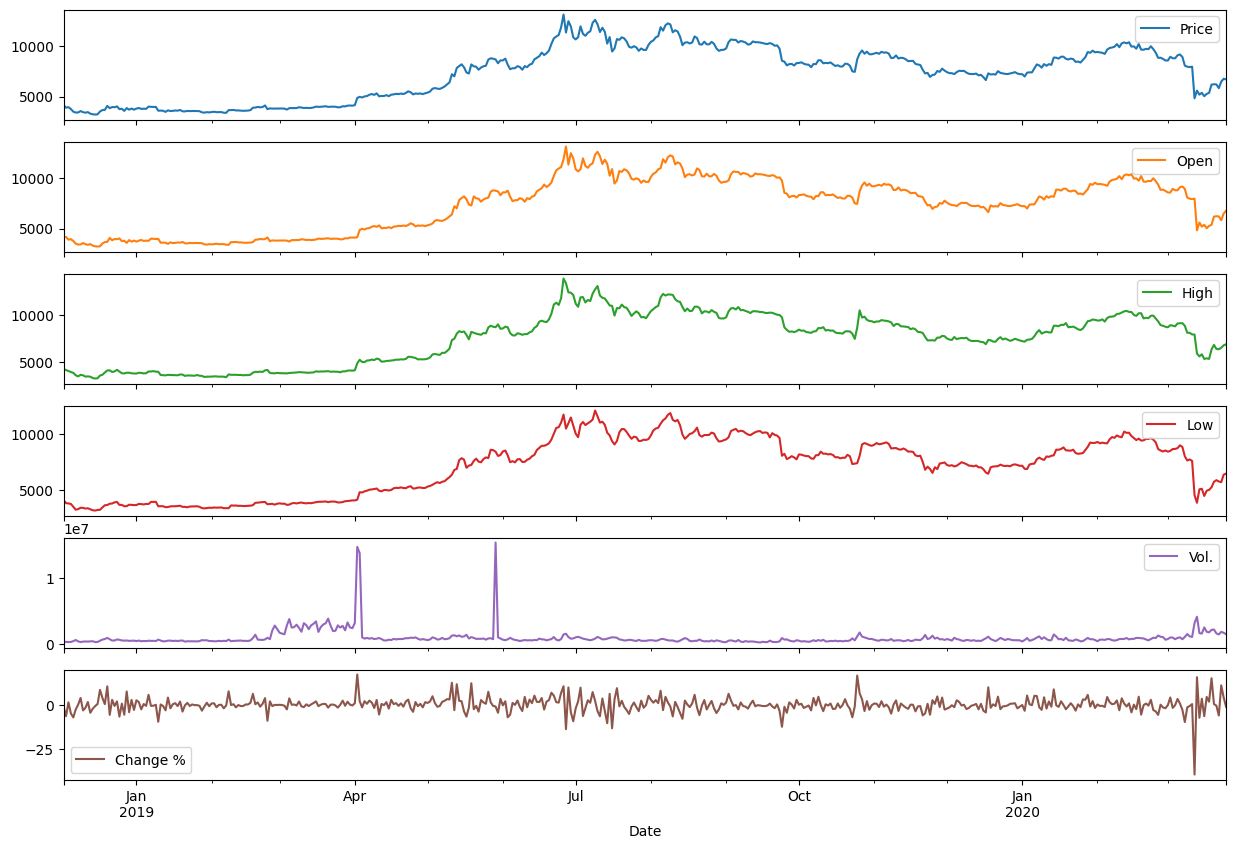

In [253]:
plot_cols = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
plot_features = df[plot_cols]
plot_features.index = datetime
_ = plot_features.plot(subplots=True, figsize=(15,10))

plot_features = df[plot_cols][:480]
plot_features.index = datetime[:480]
_ = plot_features.plot(subplots=True, figsize=(15,10))

In [254]:
df.describe().transpose()

count          mean           std      min        25%        50%  \
Price     2000.0  2.666003e+04  1.804358e+04  3228.70   9776.750   23516.85   
Open      2000.0  2.662752e+04  1.802503e+04  3228.60   9772.725   23484.05   
High      2000.0  2.726127e+04  1.847695e+04  3282.30   9982.950   24115.25   
Low       2000.0  2.595704e+04  1.752565e+04  3177.00   9567.950   23029.55   
Vol.      2000.0  3.066443e+07  2.437694e+08   260.00  69940.000  168425.00   
Change %  2000.0  2.041500e-01  3.535383e+00   -39.18     -1.305       0.06   

                 75%           max  
Price      40021.900  7.306630e+04  
Open       40003.075  7.306670e+04  
High       41329.100  7.374090e+04  
Low        38904.300  7.133840e+04  
Vol.      559187.500  4.470000e+09  
Change %       1.720  1.941000e+01

In [255]:
column_indices = {name: i for i, name in enumerate(df.columns)}
column_indices

n = len(df)
train_df = df[int(n*0.7):]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
print(f"col_indices: {column_indices}")
print(f"num_features {num_features}")

col_indices: {'Price': 0, 'Open': 1, 'High': 2, 'Low': 3, 'Vol.': 4, 'Change %': 5}
num_features 6


In [256]:
test_df

Price     Open     High      Low      Vol.  Change %
1800  35042.0  35020.3  35275.6  34742.9   29810.0      0.06
1801  35426.1  35042.1  35877.9  34536.9   53490.0      1.10
1802  35636.9  35426.2  36050.2  35148.8   46330.0      0.60
1803  36700.5  35636.9  37942.0  35578.1  115560.0      2.98
1804  37303.0  36700.5  37496.1  36347.2   59560.0      1.64
...       ...      ...      ...      ...       ...       ...
1995  66279.1  66919.0  67662.5  65937.3   36190.0     -0.95
1996  71422.7  66278.3  71482.8  66076.5  112660.0      7.76
1997  70139.9  71430.5  71872.0  69181.7  108560.0     -1.80
1998  69155.4  70141.0  70593.4  69024.3   65080.0     -1.40
1999  69614.3  69166.3  69835.1  69166.3   58230.0      0.66

[200 rows x 6 columns]

## Normalize the Data

In [257]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

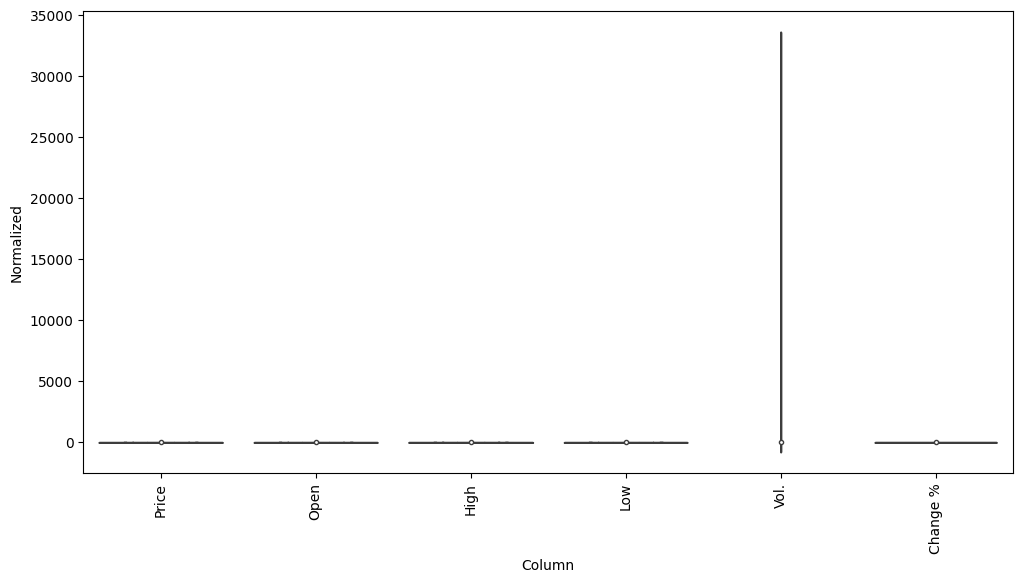

In [258]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)